In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
############################################
# Load the data
############################################
data_view = pd.read_excel("CINV Final Raw Data_ADI2024.xlsx", sheet_name="Data View")
print(data_view.shape)

variable_view = pd.read_excel("CINV Final Raw Data_ADI2024.xlsx", sheet_name="Variable View")
print(variable_view.shape)

(110, 55)
(110, 55)


In [3]:
# check for missing values
print(data_view.isnull().sum())

Patient_Code                                                  0
Gender                                                        0
Age                                                           0
Weight                                                        0
Height                                                        0
BMI                                                           0
BSA                                                           0
Marital_Status                                                0
Religion                                                      0
County_of_Residence                                           0
Smoking_Status                                                0
Drinking_Status                                               0
Last_Meal_Before_Chemotherapy                                 0
Stage_of_Breast_Cancer                                        0
Duration_of_Illness                                           0
Children                                

In [4]:
data_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Patient_Code                                                110 non-null    int64  
 1   Gender                                                      110 non-null    int64  
 2   Age                                                         110 non-null    int64  
 3   Weight                                                      110 non-null    float64
 4   Height                                                      110 non-null    float64
 5   BMI                                                         110 non-null    float64
 6   BSA                                                         110 non-null    float64
 7   Marital_Status                                              110 non-null    int64  
 8   

Scale_of_Nausea_0_to_24_hours_post_Chemotherapy
0     31
10    25
8     15
9     10
6      9
5      7
7      7
3      3
4      2
2      1
Name: count, dtype: int64

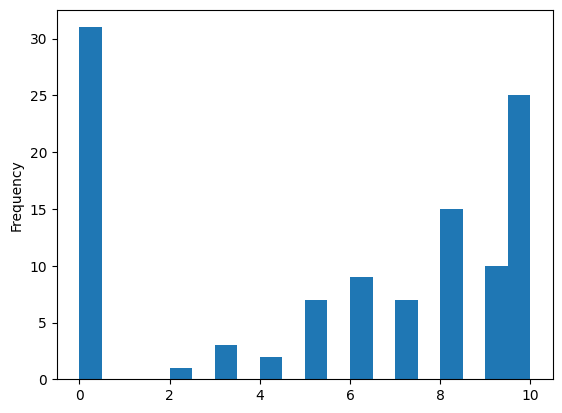

In [5]:
data_view["Scale_of_Nausea_0_to_24_hours_post_Chemotherapy"].plot(kind="hist", bins=20) 
data_view.value_counts("Scale_of_Nausea_0_to_24_hours_post_Chemotherapy")    

In [6]:
y = data_view["Scale_of_Nausea_0_to_24_hours_post_Chemotherapy"]

# Remove classes with only one member
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
filtered_data_view = data_view[data_view["Scale_of_Nausea_0_to_24_hours_post_Chemotherapy"].isin(valid_classes)]
filtered_y = filtered_data_view["Scale_of_Nausea_0_to_24_hours_post_Chemotherapy"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    filtered_data_view, filtered_y, test_size=0.3, random_state=42, stratify=filtered_y
)

In [10]:
X_train["County_of_Residence"].value_counts()

County_of_Residence
Nairobi     27
Kiambu      20
Muranga     10
Kirinyag     5
Machakos     3
Nyeri        3
Embu         2
Nakuru       1
Murang'a     1
Makueni      1
Laikipia     1
Busia        1
Kisii        1
Name: count, dtype: int64

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['County_of_Residence'])
    ],
    remainder='passthrough'
)

# Create the pipeline with your decision tree
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))
])

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.24      1.00      0.38         4
           9       0.00      0.00      0.00         3
          10       0.75      0.38      0.50         8

    accuracy                           0.48        33
   macro avg       0.21      0.26      0.20        33
weighted avg       0.46      0.48      0.43        33



c:\Users\GomezLina(BipGroup)\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GomezLina(BipGroup)\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GomezLina(BipGroup)\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

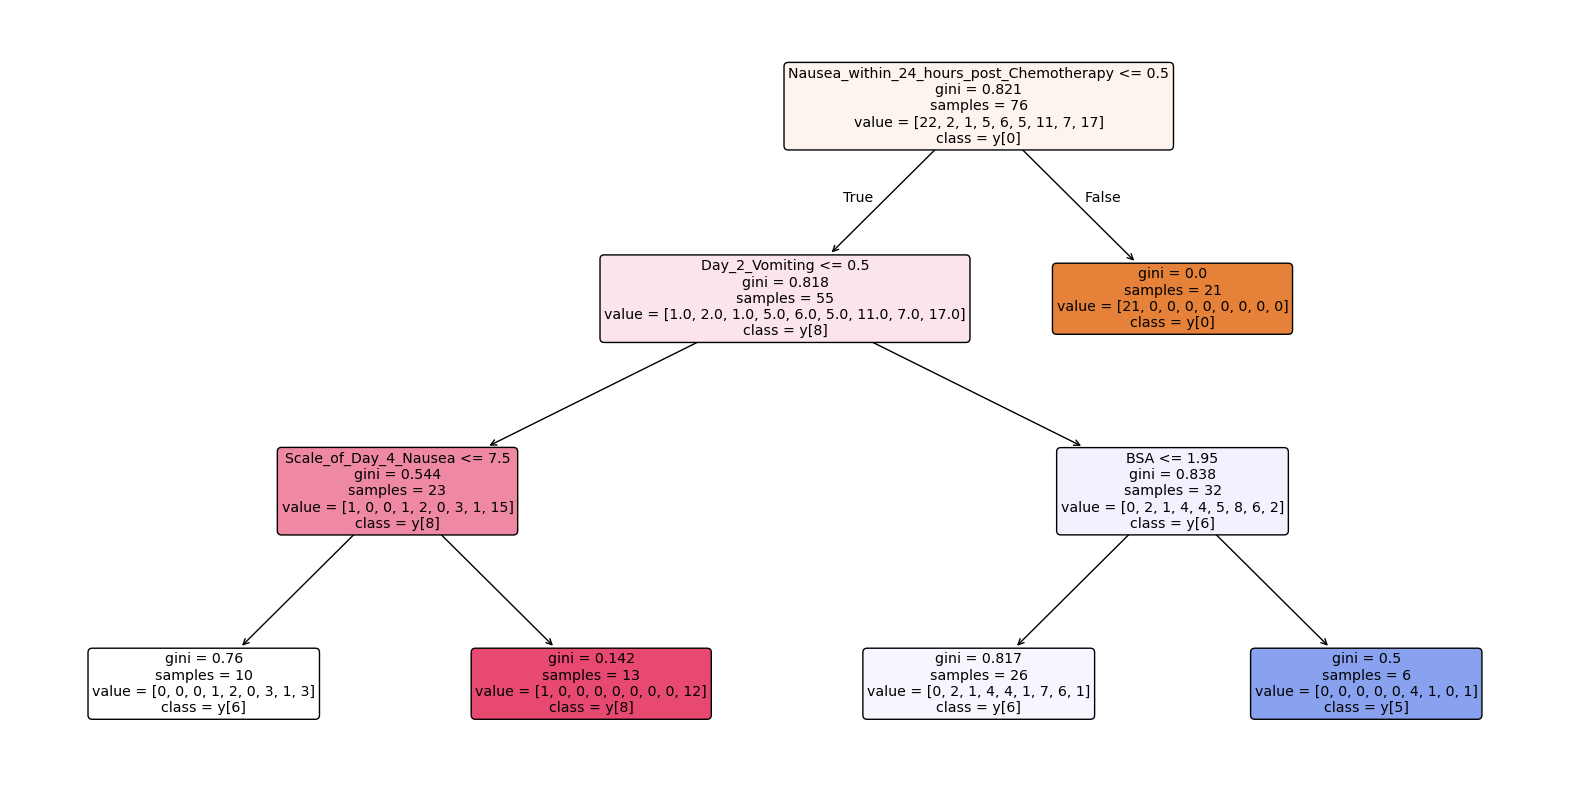

In [ ]:
onehot_features = (preprocessor
                  .named_transformers_['onehot']
                  .get_feature_names_out(['County_of_Residence']))

feature_names = list(onehot_features) + [col for col in X_train.columns 
                                       if col != 'County_of_Residence']

plt.figure(figsize=(20,10))
plot_tree(pipeline.named_steps['classifier'], 
          feature_names=feature_names,
          class_names=True, 
          filled=True,
          rounded=True)
plt.show()

In [19]:
# Get feature importances from the trained model
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = (list(preprocessor
                .named_transformers_['onehot']
                .get_feature_names_out(['County_of_Residence'])) + 
                [col for col in X_train.columns if col != 'County_of_Residence'])

# Create a dataframe of features and their importance scores
import pandas as pd
feature_importance = pd.DataFrame({'feature': feature_names, 
                                 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

for feature in feature_importance.itertuples():
    if feature.importance > 0:
        print(f"{feature.feature}: {feature.importance:.2f}")

Nausea_within_24_hours_post_Chemotherapy: 0.61
Day_2_Vomiting: 0.20
Scale_of_Day_4_Nausea: 0.11
BSA: 0.09


In [20]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Modify the pipeline to include feature selection
pipeline_with_selection = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(LassoCV())),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit and evaluate
pipeline_with_selection.fit(X_train, y_train)
y_pred = pipeline_with_selection.predict(X_test)

# Print results
print("Accuracy with feature selection:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get selected features
selected_features_mask = pipeline_with_selection.named_steps['feature_selection'].get_support()
selected_features = [f for f, selected in zip(feature_names, selected_features_mask) if selected]
print("\nSelected features:", selected_features)

Accuracy with feature selection: 0.3333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.25      0.50      0.33         4
           9       0.00      0.00      0.00         3
          10       0.75      0.38      0.50         8

    accuracy                           0.33        33
   macro avg       0.31      0.27      0.28        33
weighted avg       0.47      0.33      0.37        33


Selected features: ['Patient_Code', 'Weight', 'Duration_of_Illness', 'Scale_of_Day_2_Nausea', 'Scale_of_Day_3_Nausea', 'Scale_of_Day_4_Nausea', 'Scale_of_Day_5_Nausea']


c:\Users\GomezLina(BipGroup)\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GomezLina(BipGroup)\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GomezLina(BipGroup)\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control